<a href="https://colab.research.google.com/github/bhanusriginjupalli/ML-assignment/blob/main/ML05_aie23107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Select feature and target variable
X = df[['Glucose']]  # Feature: Glucose levels
y = df['Outcome']    # Target: Diabetes outcome (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mse, test_mse


(0.17942747567178632, 0.17113033279525355)

In [2]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import numpy as np

# Calculate RMSE (Root Mean Squared Error)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate MAPE (Mean Absolute Percentage Error)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Calculate R2 Score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
train_rmse, test_rmse, train_mape, test_mape, train_r2, test_r2


(np.float64(0.42358880494152146),
 np.float64(0.4136790214589731),
 837273235312866.4,
 775885808155587.4,
 0.20804279654899438,
 0.25463232826956206)

In [4]:
# Select multiple features (all except Outcome)
X_multi = df.drop(columns=['Outcome'])
y = df['Outcome']

# Split the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Train the Linear Regression model with multiple features
reg_multi = LinearRegression().fit(X_train_multi, y_train_multi)

# Make predictions
y_train_pred_multi = reg_multi.predict(X_train_multi)
y_test_pred_multi = reg_multi.predict(X_test_multi)

# Calculate evaluation metrics for training and testing sets
train_mse_multi = mean_squared_error(y_train_multi, y_train_pred_multi)
test_mse_multi = mean_squared_error(y_test_multi, y_test_pred_multi)

train_rmse_multi = np.sqrt(train_mse_multi)
test_rmse_multi = np.sqrt(test_mse_multi)

train_mape_multi = mean_absolute_percentage_error(y_train_multi, y_train_pred_multi)
test_mape_multi = mean_absolute_percentage_error(y_test_multi, y_test_pred_multi)

train_r2_multi = r2_score(y_train_multi, y_train_pred_multi)
test_r2_multi = r2_score(y_test_multi, y_test_pred_multi)

# Display results
train_mse_multi, test_mse_multi, train_rmse_multi, test_rmse_multi, train_mape_multi, test_mape_multi, train_r2_multi, test_r2_multi


(0.15744485172625472,
 0.17104527280850104,
 np.float64(0.3967932102824527),
 np.float64(0.4135761995189049),
 781425651887298.2,
 858432211010920.2,
 0.30506972801106247,
 0.25500281176741757)

In [5]:
from sklearn.cluster import KMeans

# Remove the target variable for clustering
X_cluster = df.drop(columns=['Outcome'])

# Perform K-Means clustering with k=2 (since we have two possible outcomes: 0 or 1)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_cluster)

# Get cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Display the first 10 cluster labels and cluster centers
cluster_labels[:10], cluster_centers


(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int32),
 array([[  3.88391376, 115.26699834,  68.09784411,  17.6185738 ,
          32.21227197,  31.17363184,   0.43757048,  33.11442786],
        [  3.7030303 , 141.46060606,  72.78787879,  31.2       ,
         253.70909091,  34.98545455,   0.59724848,  33.7030303 ]]))

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Compute clustering evaluation metrics
silhouette = silhouette_score(X_cluster, cluster_labels)
calinski_harabasz = calinski_harabasz_score(X_cluster, cluster_labels)
davies_bouldin = davies_bouldin_score(X_cluster, cluster_labels)

# Display the scores
silhouette, calinski_harabasz, davies_bouldin


(np.float64(0.5687897205830247),
 np.float64(964.2725250859544),
 np.float64(0.7133822795826191))

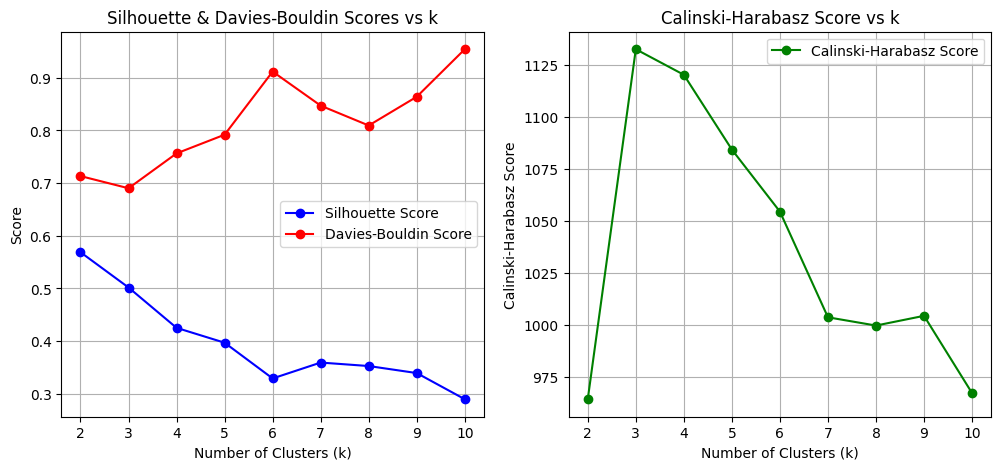

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Try different values of k from 2 to 10
k_values = range(2, 11)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_cluster)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_cluster, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(X_cluster, kmeans.labels_))

# Create separate plots for better visibility

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Silhouette Score and Davies-Bouldin Score in the same plot
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Score")
ax1.plot(k_values, silhouette_scores, 'bo-', label="Silhouette Score")
ax1.plot(k_values, davies_bouldin_scores, 'ro-', label="Davies-Bouldin Score")
ax1.legend()
ax1.set_title("Silhouette & Davies-Bouldin Scores vs k")
ax1.grid()

# Plot Calinski-Harabasz Score separately
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Calinski-Harabasz Score")
ax2.plot(k_values, calinski_harabasz_scores, 'go-', label="Calinski-Harabasz Score")
ax2.legend()
ax2.set_title("Calinski-Harabasz Score vs k")
ax2.grid()

plt.show()


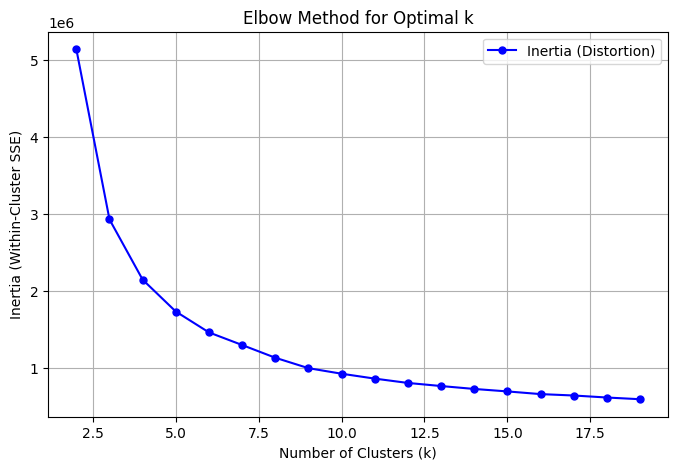

In [10]:
# Compute distortions (inertia) for different k values
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X_cluster)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, 'bo-', markersize=5, label="Inertia (Distortion)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid()
plt.show()
